# S06 T01: Tasca mètodes de mostreig

In [1]:
import math

import numpy as np
from numpy import random
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

El dataset escollit és sobre els Jocs Olímpics de Tokyo 2020. S'hi pot veure el detall de totes les competicions que van tenir lloc, juntament amb l'edat, nacionalitat, classificació i medalles de cada atleta

Columnes: 
- Unnamed: 0 : # de fila
- Code: codi únic de cada atleta
- Name: nom de l'atleta (COGNOM Nom)
- Gender: Male o Female
- Age: edat dels atletes
- NOC: Comité Olímpic Nacional (206 en total)
- Country: país (206 en total)
- Discipline: cada codi indica una disciplina específica (46 en total)
- Sport: esport equivalent al codi de la columna anterior (46 en total)
- Event: tipus de competició (per equips, individual, masculina, femenina, etc.)
- Rank: classificacio de cada 'Event', sent 1 la 1a posició.
- Medal: medalla (Gold, Silver, Bronze o NaN)

In [2]:
# Carreguem el dataset i eliminem columnes que no volem:

olympics = pd.read_csv('/Users/deliagonzalezmata/Downloads/2020_Olympics_Dataset.csv', encoding = 'latin-1')

olympics = olympics.drop('Unnamed: 0', 1)
olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
olympics = olympics.drop('Discipline', 1) #la columna Sport conté la mateixa informació de forma més clara

olympics.sample(5)

/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1007/3270594272.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Unnamed: 0', 1)
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1007/3270594272.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1007/3270594272.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1007/3270594272.py:8: FutureWarning: In a future version of 

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
12931,TAMURA Norika,Female,30,Japan,Fencing,Women's Sabre Individual,26.0,NaN
537,ANDRUSENKO Veronika,Female,30,Russia,Swimming,Women's 4 x 100m Freestyle Relay Team,NaN,NaN
11017,REID Zac,Male,21,New Zealand,Swimming,Men's 400m Freestyle,NaN,NaN
7143,LAFONT Marie-Zelia,Female,34,France,Canoe Slalom,Women's Kayak,14.0,NaN
14249,WEGER Svenja,Female,27,Germany,Sailing,Women's One Person Dinghy - Laser Radial,16.0,NaN


In [3]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15121 non-null  object 
 1   Gender   15121 non-null  object 
 2   Age      15121 non-null  int64  
 3   Country  15121 non-null  object 
 4   Sport    15121 non-null  object 
 5   Event    15121 non-null  object 
 6   Rank     11355 non-null  float64
 7   Medal    2449 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 945.2+ KB


In [4]:
round(olympics.describe(), 2)

,Age,Rank
count,15121.00,11355.00
mean,26.77,10.75
std,5.61,10.68
min,12.00,1.00
25%,23.00,4.00
50%,26.00,8.00
75%,30.00,13.00
max,66.00,85.00


In [5]:
olympics.Rank.isna().sum()

3766

Amb la funció "describe" ja podem veure algunes dades interessants del nostre Dataset, com per exemple que l'atleta més jove té 12 anys vs. l'atleta més gran en té 66.
També veiem que la Classificació va d' 1 fins a 85 i que hi ha 3.766 entrades sense classificació. 

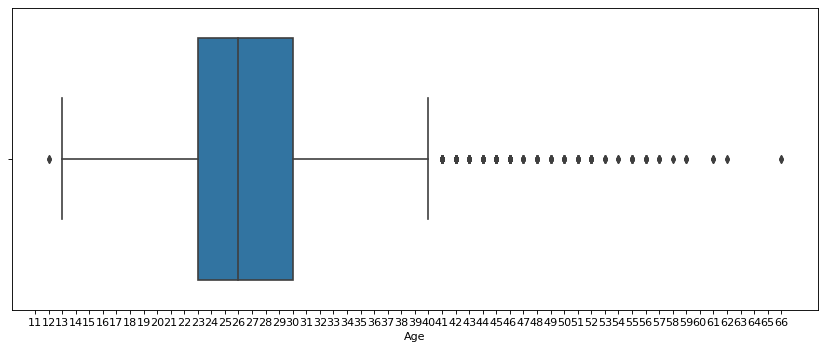

In [6]:
values=olympics.Age.value_counts().sort_index()

#sns.set(style="darkgrid")
plt.figure(figsize=(13, 5), dpi=80)
plt.xticks (range(11,67))
sns.boxplot(x = olympics.Age, )
plt.show()

Anem a generar informació d'aquelles columnes que no son numèriques (variables categòriques), per fer-nos una millor idea del que podem trobar en el nostre conjunt de dades: 

In [7]:
non_number = olympics [['Gender', 'Country', 'Sport', 'Event', 'Medal']]
non_number.describe()

,Gender,Country,Sport,Event,Medal
count,15121,15121,15121,15121,2449
unique,2,206,46,306,3
top,Male,United States,Athletics,Men Team,Bronze
freq,7855,856,2318,1425,867


Aquí igualment la funció "describe" ens proporciona dades interessants sobre la nostra població, tals com: 
- han participat més homes que dones als Jocs Olímpics de Tokyo
- el país que ha portat més atletes és Estats Units
- l'esport on han participat més atletes és "Athletics"
- extranyament, s'han donat més medalles de Bronze que de qualsevol altre metall.

#### Gender

In [8]:
olympics.Gender.value_counts()

Male      7855
Female    7266
Name: Gender, dtype: int64

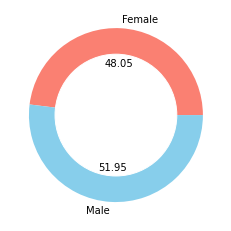

In [9]:
male = (7855 / 15121)*100
female = (7266 / 15121)*100


names = olympics.Gender.unique()
size = [female, male]

my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['salmon','skyblue'], autopct = '%.2f')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#### Country 

Veiem els 20 països amb més atletes als JJ.OO. de Tokyo:

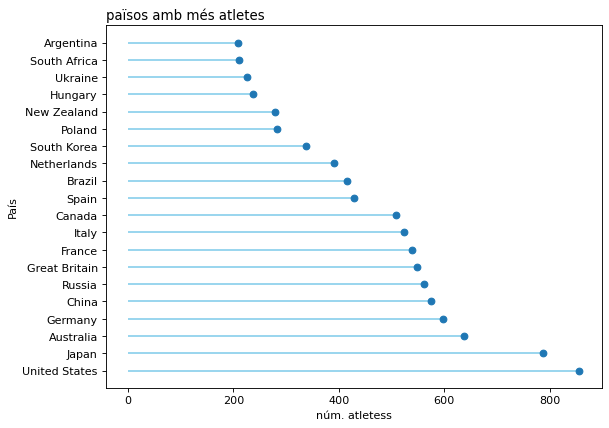

In [10]:
names = olympics.Country.value_counts()[:20].index.tolist()
values=olympics.Country.value_counts()[:20].values.tolist()

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)


# The horizontal plot is made using the hline function
plt.hlines(y=names, xmin=0, xmax=values, color='skyblue')
plt.plot(values, names, "o")
plt.ylim(-1,20)
 
# Add titles and axis names
plt.yticks( names)
plt.title("països amb més atletes", loc='left')
plt.xlabel('núm. atletess')
plt.ylabel('País')

# Show the plot
plt.show()

#### Sport

In [11]:
olympics.Sport.value_counts()[:10]

Athletics              2318
Swimming               1634
Artistic Gymnastics    1061
Football                608
Shooting                577
Rowing                  526
Judo                    516
Hockey                  432
Cycling Track           426
Equestrian              420
Name: Sport, dtype: int64

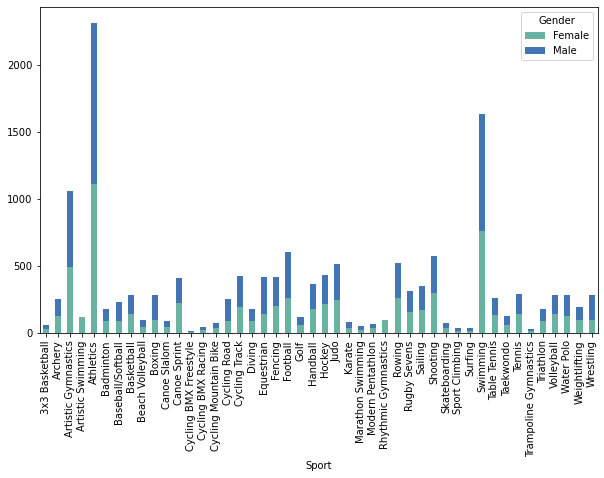

In [12]:
# Analitzem la diferència de gènere a cada esport mitjançant un gràfic:

gender_by_sport = olympics.groupby(['Sport', 'Gender']).size()
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
gender_by_sport.unstack().plot(kind='bar', stacked=True, figsize=(10,6))

plt.show()

#### Event

Hem vist amb la funció describe que hi ha 306 diferents tipus d'Events. Veiem els 10 amb més participants:

In [13]:
olympics.Event.value_counts()[:10]

Men Team              1425
Women Team            1317
Mixed Team             181
Women's Singles        177
Men's Singles          171
Women's Individual     155
Men's Individual       151
Baseball Team          144
Men's Team             132
Women's Team           132
Name: Event, dtype: int64

#### Medal 

In [14]:
olympics.Medal.unique()

array([nan, 'Gold', 'Silver', 'Bronze'], dtype=object)

In [15]:
olympics.Medal.value_counts()

Bronze    867
Gold      800
Silver    782
Name: Medal, dtype: int64

### Mostra aleatoria Simple

En un mostreig aleatori simple, tots els elements que formen la població tenen idèntica probabilitat de ser escollits per la mostra. És un procés equivalent a fer un sorteig. 

Hi ha dos tipus de mostreig aleatori simple:
- amb reposició: quan un idndividu de la població pot ser escollit més d'1 vegada per formar part de la mostra.
- sense reposició: quan un individu de la població NO pot aparèixer més d'un cop a la mostra. 

Atés que la mida de la nostra població (N) és bastant gran, es recomana fer mostreig aleatori simple amb reposició. és per això que dins la nostra mostra podriem trobar el mateix atleta repetit varies vegades. 

Un cop hem definit quin tipus de Mostreig realitzarem, hem de calcular el tamany òptim de la nostra mostra per a garantitzar que no se supera el marge d'error que desitgem (en aquest cas i el més comú és un 5%). 

In [16]:
# Mida de la població
mida_poblacio = olympics.shape[0]
mida_poblacio

15121

**Mida de la mostra**: 

Per calcular el tamany òptim de la mostra sabem que existeix la fòrmula seguent: 

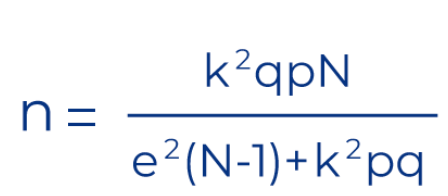

In [17]:
from IPython import display
display.Image("/Users/deliagonzalezmata/Desktop/tamany_mostra.png", width=100, height=100)

on **n** és el tamany mostral,

**N** el tamany de la població,

**e** el marge d'error, que fixarem al 5%,

**k** el Zscore donat un nivell de confiança(NC) que fixarem al 95% i, per tant, k = 1.96,

**p** és la probabilitat d'èxit, que com que no la sabem la fixarem al 50%,

i **q** és la probabilitat de fracàs. És a dir, 1-p.

In [18]:
# Mida de la mostra

N = mida_poblacio
e = 0.05
k = 1.96
p = 0.5
q = 1-p

mida_mostra = (N*p*q*(k**2))/((e**2)*(N-1)+(k**2)*p*q)

round(mida_mostra,2)

374.67

In [19]:
# Generem una mostra aleatòria simple (MAS)
n = 375
MAS = olympics.sample(n=n)
MAS

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
12430,SOGHOMONYAN Koryun,Male,28,Armenia,Boxing,Men's Fly (48-52kg),17.0,NaN
8748,MIKULAK Samuel,Male,28,United States,Artistic Gymnastics,Men's Rings,NaN,NaN
9936,OTOGBE Mawupemon,Male,18,Togo,Swimming,Men's 50m Freestyle,NaN,NaN
12581,STANCO Silvana,Female,28,Italy,Shooting,Trap Women,5.0,NaN
3979,FORDE Brooke,Female,22,United States,Swimming,Women's 4 x 200m Freestyle Relay Team,2.0,Silver
...,...,...,...,...,...,...,...,...
13518,TYACK Ryan,Male,30,Australia,Archery,Men's Team,9.0,NaN
6848,KORA Salome,Female,27,Switzerland,Athletics,Women's 4 x 100m Relay Team,4.0,NaN
3288,DOO Hoi Kem,Female,24,"Hong Kong, China",Table Tennis,Women's Singles,5.0,NaN
1547,BORGES Felipe,Male,36,Brazil,Handball,Men Team,10.0,NaN


### Mostra aleatoria Sistemàtica

Consisteix en escollir un individu inicial de forma aleatoria entre la població i, a continuació, escollir els individus restants mitjançant la successió aritmètica a partir del 1r individu escollit. 

si **A** és la posició que ocupa el primer individu dins la població, podem calcular la resta d'individus que formaran també part de la mostra de la següent forma: 

* A, A+K, A+2K, A+3K, ...., A+(n-1)K.

on **K** és el coeficient d'elevació o interval i que, alhora, podem calcular de la següent forma: 

* K = N / n 

on **N** és el tamany de la població i **n** el tamany de la mostra

In [20]:
# definim interval K:

K = int(N/n)
K 

40

Això ens indica que el primer individu de la mostra ha d'estar entre la posició 1 i 40 de la població i, a partir d'aquí anar sumant de 40 en 40 fins a trobar-los tots. 

In [21]:
# 1r individu aleatori
A = np.random.randint(0, K)

#resta d'individus:
mostra_sistematica = olympics[A:N:K]
mostra_sistematica

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
36,ABDELSALAM Nour,Female,28,Egypt,Taekwondo,Women -49kg,11.0,NaN
76,ABELVIK ROED Magnus,Male,24,Norway,Handball,Men Team,7.0,NaN
116,ACHIUWA Precious,Male,21,Nigeria,Basketball,Men Team,10.0,NaN
156,AFANADOR Brian,Male,24,Puerto Rico,Table Tennis,Men's Singles,49.0,NaN
196,AHMED Enas,Female,32,Egypt,Wrestling,Women's Freestyle 68kg,14.0,NaN
...,...,...,...,...,...,...,...,...
14956,ZEID Josh,Male,34,Israel,Baseball/Softball,Baseball Team,5.0,NaN
14996,ZHANG Jin,Female,20,China,Artistic Gymnastics,Women's Uneven Bars,NaN,NaN
15036,ZHAO Zhonghao,Male,26,China,Shooting,50m Rifle 3 Positions Men,11.0,NaN
15076,ZIRK Kregor,Male,22,Estonia,Swimming,Men's 400m Freestyle,NaN,NaN


### Exercici 2: Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Mostra aleatoria Estratificada

Aquesta tècnica, abans de començar el procés de mostreig divideix tota la població en diferents subpoblacions o estrats. 

- Cada individu només pot pertanyer a un estrat.
- Els estrats solen ser grups homogenis d'individus, que al mateix temps son heterogenis entre diferents grups. Per exemple, definir els Estrats per sexe, edat, classe social, religió, zona geogràfica, etc.

Un cop definits els estrats i els individus que pertanyen a cada estrat, la mostra es crea seleccionant per separat individus de cada estrat, empleant la tècnica de mostreig aleatori simple. 

En aquest cas, definirem els estrats en funció del Gènere. Per tant, generarem una mostra de tamany n=374, que idealment tindrà el mateix número d'homes que de dones.

In [22]:
mostra_estratificada = olympics.groupby('Gender', group_keys=False).apply(lambda x: x.sample(int(374/2)))
mostra_estratificada

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
2519,COATANEA Pauline,Female,28,France,Handball,Women Team,1.0,Gold
7731,LONGHI Giulia,Female,28,Italy,Baseball/Softball,Softball Team,6.0,NaN
11270,ROOSKRANTZ Caitlin,Female,19,South Africa,Artistic Gymnastics,Women's All-Around,NaN,NaN
9775,OLEKSIAK Penny,Female,21,Canada,Swimming,Women's 4 x 100m Medley Relay Team,3.0,Bronze
12479,SORRIBES TORMO Sara,Female,24,Spain,Tennis,Women's Singles,9.0,NaN
...,...,...,...,...,...,...,...,...
6904,KOVACS Benedek,Male,23,Hungary,Swimming,Mixed 4 x 100m Medley Relay Team,NaN,NaN
1441,BOATENG Bismark,Male,29,Canada,Athletics,Men's 4 x 100m Relay Team,3.0,Bronze
8723,MIGUEL Aveni,Male,18,Angola,Athletics,Men's 100m,NaN,NaN
3081,DENDY Marquis,Male,28,United States,Athletics,Men's Long Jump,NaN,NaN


comprovem que efectivament la mostra aleatoria ha tingut en compte 50% d'homes i 50% dones:

In [23]:
mostra_estratificada.Gender.value_counts()

Female    187
Male      187
Name: Gender, dtype: int64

### SMOTE (Synthetic Minority Oversampling Technique)

Per realitzar el mostreig amb la tècnica SMOTE hem dividit l'edat dels atletes en 2 subgrups en una nova columna "grup_edat" i amb els següents codis: 
- assignem **0** a aquells atletes amb 30 anys o menys.
- assignem **1** a aquells atletes amb més de 30 anys.

In [24]:
olympics['grup_edat'] = [0 if x <= 30 else 1 for x in olympics.Age]
olympics.head()

,Name,Gender,Age,Country,Sport,Event,Rank,Medal,grup_edat
0,AALERUD Katrine,Female,26,Norway,Cycling Road,Women's Road Race,37.0,NaN,0
1,AALERUD Katrine,Female,26,Norway,Cycling Road,Women's Individual Time Trial,20.0,NaN,0
2,ABAD Nestor,Male,28,Spain,Artistic Gymnastics,Men's All-Around,NaN,NaN,0
3,ABAD Nestor,Male,28,Spain,Artistic Gymnastics,Men's Floor Exercise,NaN,NaN,0
4,ABAD Nestor,Male,28,Spain,Artistic Gymnastics,Men's Pommel Horse,NaN,NaN,0


Un cop tenim els 2 grups d'edat, veiem en un gràfic quina és la representació de cada un dels grups (menors de 30 i majors de 30) dins la nostra població/dataset i observarem que hi ha una gran diferència entre la quantitat d'individus d'un grup i de l'altre.

In [25]:
olympics.grup_edat.value_counts()

0    11870
1     3251
Name: grup_edat, dtype: int64

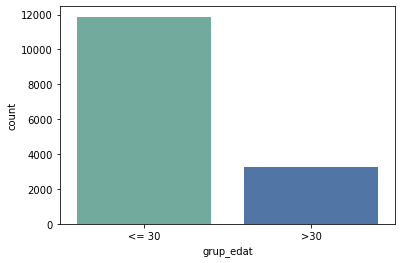

In [26]:
sns.countplot(data = olympics, x='grup_edat')
plt.xticks([0,1], ['<= 30', '>30']);

Un dels problemes més comuns de treballar amb un conjunt de dades desequilibrat és que el model esdevé esbiaixat a favor de la classe dominant. 

el mètode SMOTE és una tècnica de sobremostreig que ens permet generar mostres sintètiques de la categoria minoritaria. Aquesta creació de noves instàncies es fa interpolant els valors de les instancies minoritaries més pròximes:

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
import collections
from collections import Counter


sm = SMOTE()

smote_sample = olympics.dropna()
smote_sample = olympics[['Rank', 'Age', 'grup_edat']] #les úniques columnes numèriques

X = smote_sample[['Age']]
y = smote_sample.grup_edat
X_sm, y_sm = sm.fit_resample(X,y)
print('nou SMOTE dataset %s' % Counter(y_sm))

nou SMOTE dataset Counter({0: 11870, 1: 11870})


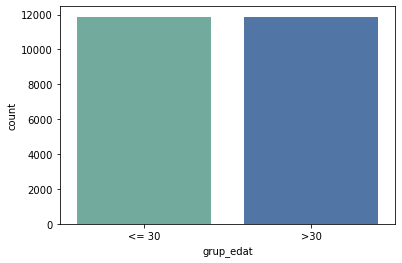

In [28]:
sns.countplot(x=y_sm)
plt.xticks([0,1], ['<= 30', '>30']);

un cop utilitzada la tècnica SMOTE hem comprovat que existeix el mateix nombre d'atletes majors i menors de 30 anys.



In [29]:
smote_sample.head()

,Rank,Age,grup_edat
0,37.0,26,0
1,20.0,26,0
2,NaN,28,0
3,NaN,28,0
4,NaN,28,0


### Exercici 3: Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

en el mètode reservoir sampling és important definir 1 paràmetre:
- k = tamany de la mostra que volem

A banda, sabem que:
- n = quantitat d'elements vists fins el moment
- la probabilitat (p) de que un element estigui dins la mostra es defineix com: p = k/n

el mètode funciona de la següent forma:
1. els primers "k" elements s'emmagatzemen tots dins la mostra.
2. a partir de l'element k+1: calculem la p=k/n
3. generem un nombre aleatori(r) entre 0 i 1:
    - si r > p --> la mostra no canvia, el nombre NO entra a formar part de la mostra
    - si r <= p --> el nombre entra dins la mostra, substituïnt un dels elements que ja hi era de forma aleatoria


veiem-ho en un **exemple** fàcil: 

el nostre stream és [1, 8, 5, 9]

i definim una k = 3. Aleshores: 

1. sabem que les primeres 3(=k) observacions entren dins la mostra. Per lo tant, la nostra mostra seria:
    mostra = [1, 8, 5]
2. Quan arribem al 4t element (n = 4 = k+1) , calculariem la probabilitat de que el nombre 9 estigui dins la mostra: 
    p = 3/4
3. Generem un nombre aleatori (r), entre 0 i 1, per evaluar si el nombre 9 entra dins la mostra:
    - si r > 3/4 --> 9 no entra a la mostra i la mostra final serà la que ja tenim
    - si r <= 3/4 --> 9 entra a la mostra reemplaçant un dels elements ja existents ([1, 8, 5])
    
Per lo tant, depenent del valor de r, la nostra mostra canviarà o no. 
veiem-ho en el nostre dataset:

In [33]:

stream = olympics.index

k=100
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
                
                
print(reservoir) #imprimim els nums d'index del dataset que formaran part de la mostra

[10847, 14669, 12940, 11287, 5472, 5663, 1058, 4445, 8321, 10000, 3298, 596, 7195, 8887, 311, 10057, 12212, 14470, 585, 13711, 6381, 6374, 2473, 7789, 2459, 1167, 1198, 8217, 13724, 12164, 8986, 7189, 9517, 7891, 8984, 13628, 3716, 5052, 7042, 13202, 4511, 12057, 2136, 5772, 3342, 8499, 11565, 13566, 149, 9959, 7412, 6169, 9641, 4073, 4022, 13263, 10988, 5841, 13732, 6801, 6108, 13532, 7129, 9223, 12806, 2482, 8506, 8303, 2089, 13461, 3808, 4484, 10001, 5514, 7727, 7855, 9530, 6630, 11691, 12577, 7594, 8242, 10484, 330, 3627, 8127, 9740, 3055, 6315, 11893, 90, 1024, 14787, 183, 9675, 5157, 618, 1049, 2374, 12366]


In [34]:
#imprimim el dataset amb els indexs obtinguts mitjançant el mètode Reservoir Sampling 
reservoir_sampling = olympics.iloc[reservoir]
reservoir_sampling

,Name,Gender,Age,Country,Sport,Event,Rank,Medal,grup_edat
10847,RADUKANOVA Madlen,Female,21,Bulgaria,Rhythmic Gymnastics,Group All-Around Team,1.0,Gold,0
14669,YAMASAKI Erika Yuriko Iris,Female,33,Australia,Weightlifting,Women's 59kg,12.0,NaN,1
12940,TANABE Yuki,Female,31,Japan,Handball,Women Team,12.0,NaN,1
11287,ROSE Alex,Male,29,Samoa,Athletics,Men's Discus Throw,NaN,NaN,0
5472,HO-SHUE Jason,Male,22,Canada,Badminton,Men's Doubles Team,9.0,NaN,0
...,...,...,...,...,...,...,...,...,...
5157,HEALY Sarah,Female,20,Ireland,Athletics,Women's 1500m,NaN,NaN,0
618,ARAI Chizuru,Female,27,Japan,Judo,Women -70 kg,1.0,Gold,0
1049,BASIC Hana,Female,25,Australia,Athletics,Women's 100m,NaN,NaN,0
2374,CHINYEMBA Patrick,Male,20,Zambia,Boxing,Men's Fly (48-52kg),9.0,NaN,0
